# Linear Regression To 

***
Applying `statsmodels`, `seaborn`, and `scikit-learn' for Linear Regression to model Boston Housing data. The Boston Housing data set contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University.
***

In [9]:
# Import libraries and render graphs in the notebook using the matplotlib 1 inline command 

import numpy as npy
import pandas as pda
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns


from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 2: Exploratory Data Analysis for Linear Relationships

 This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) 


### Load the Boston Housing data set from `sklearn`
***



In [10]:
from sklearn.datasets import load_boston
import pandas as pda

boston_d = load_boston()

/Users/saadhameed/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [11]:
boston_d.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [12]:
boston_d.data.shape

(506, 13)

In [13]:
# Print columns
print(boston_d.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Description of  housing dataset 
print(boston_d.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [14]:
bos = pda.DataFrame(boston_d.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [16]:
bos.columns = boston_d.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [17]:
print(boston_d.target.shape)

(506,)


In [18]:
bos['PRICE'] = boston_d.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Exploratory data analysis using Describe and Scatterplots

In [19]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***


Text(0.5, 1.0, 'Relationship between CRIM and Price')

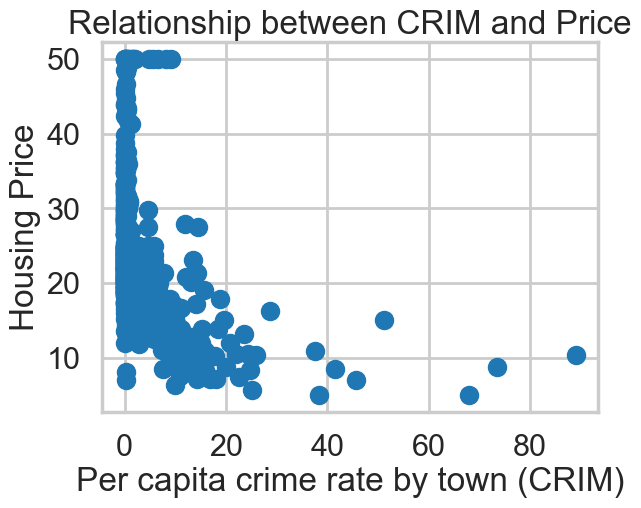

In [20]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship b/w Crime and Price")

Crime and Price are negatively correlated and don't really have a linear relationship.


Text(0.5, 1.0, 'Relationship b/w RM and Price')

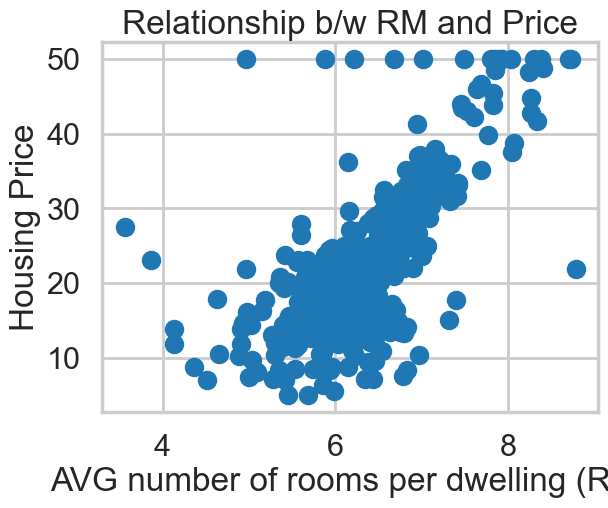

In [21]:
# Scatterplot b/w *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("AVG number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship b/w RM and Price")

Text(0.5, 1.0, 'Relationship b/w PTRATIO and Price')

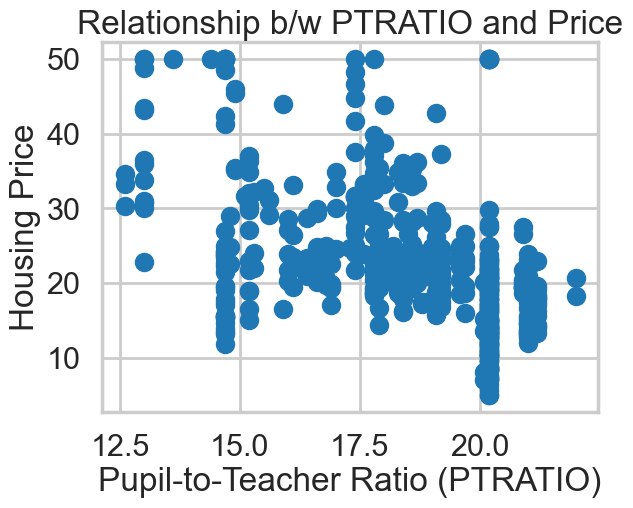

In [22]:
# Scatterplot b/w *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship b/w PTRATIO and Price")

Text(0.5, 1.0, 'Relationship b/w Tax and Price')

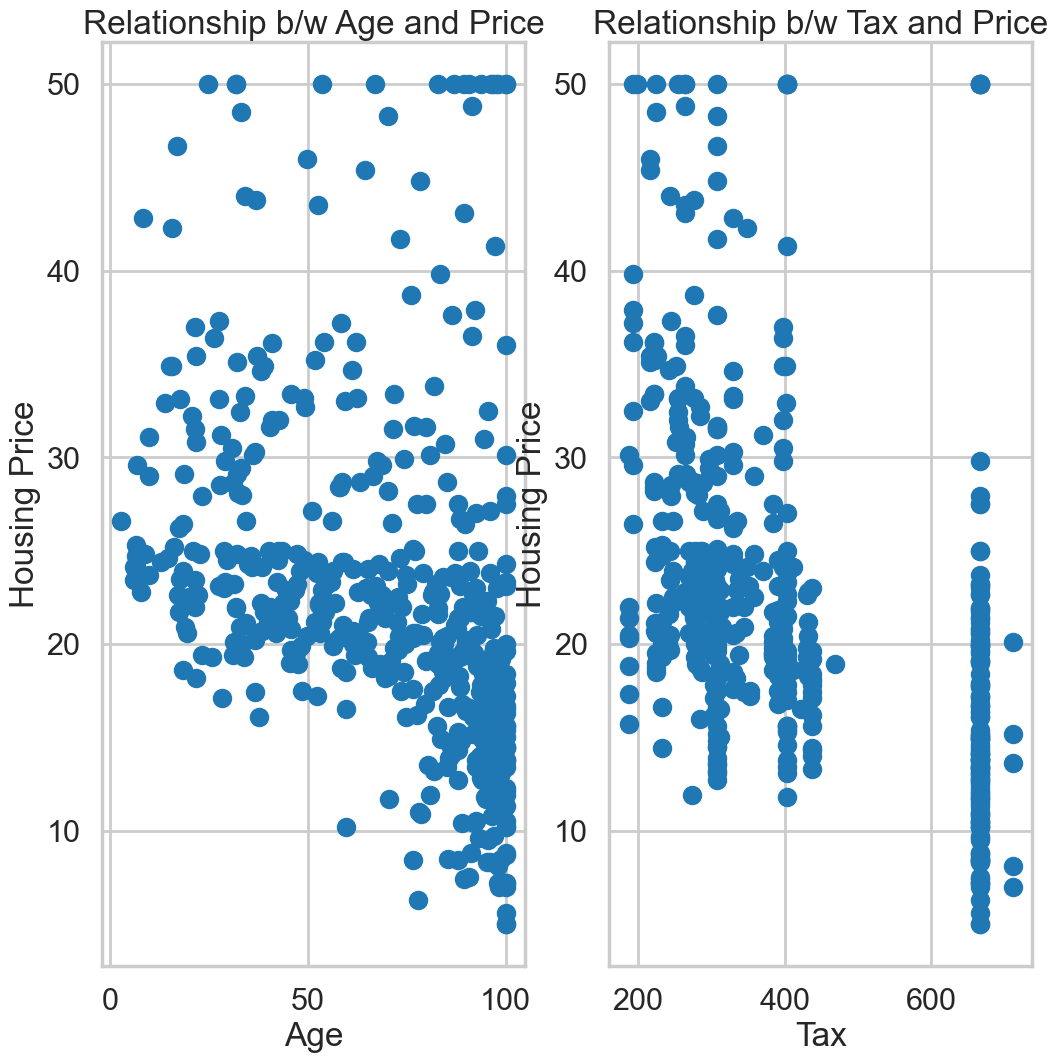

In [23]:
# your turn: create some other scatter plots
plt.figure(figsize = (12, 12))

plt.subplot(1,2,1)


plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Age")
plt.ylabel("Housing Price")
plt.title("Relationship b/w Age and Price")


plt.subplot(1,2,2)
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("Tax")
plt.ylabel("Housing Price")
plt.title("Relationship b/w Tax and Price")

### Scatterplots using Seaborn
***

Using [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits.

<Axes: xlabel='RM', ylabel='PRICE'>

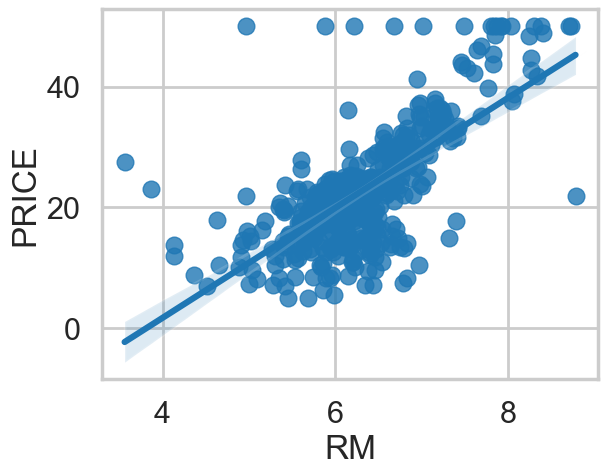

In [24]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


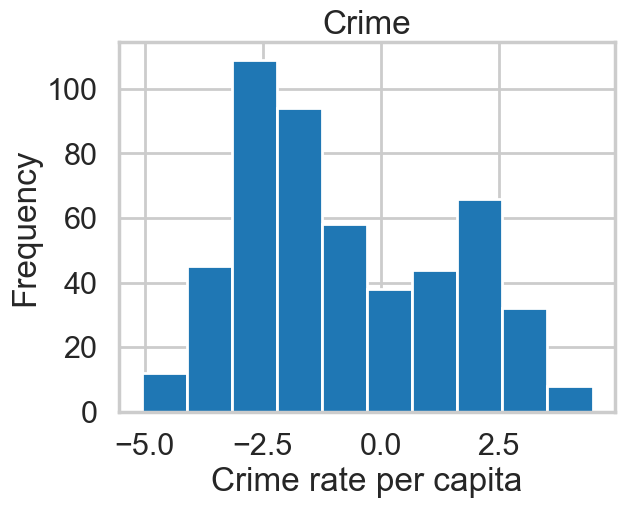

In [25]:
plt.hist(np.log(bos.CRIM))
plt.title("Crime")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

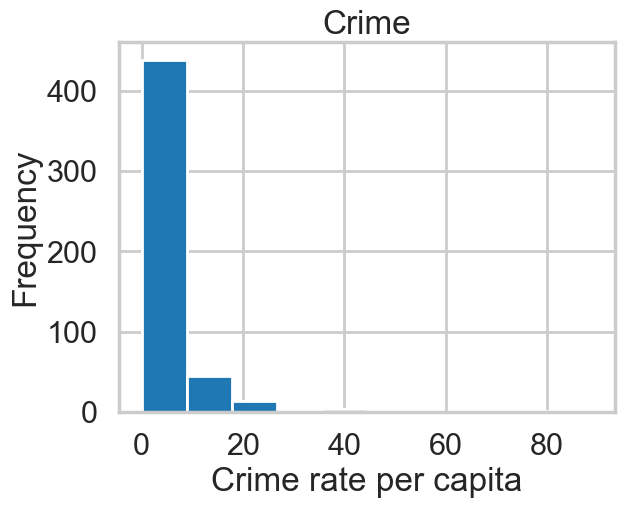

In [64]:

plt.hist(bos.CRIM)
plt.title("Crime")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

In the histogram on the log scale, we can see that the distribution is bimodal

Text(0, 0.5, 'Frequency')

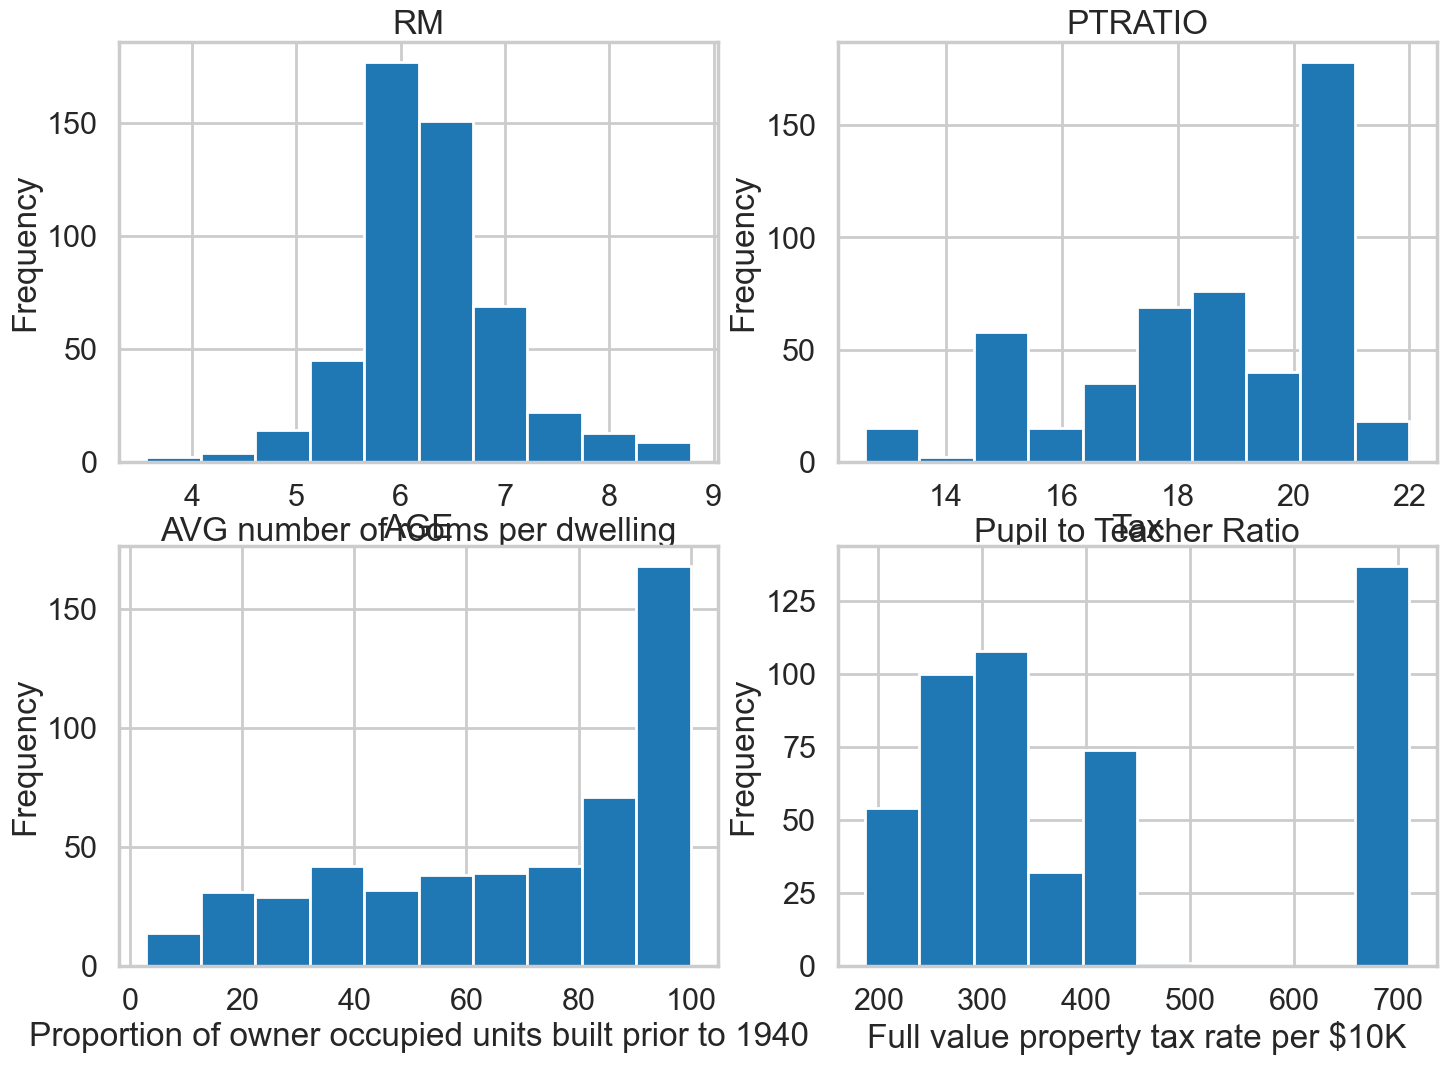

In [28]:
plt.figure(figsize = (17, 12))

plt.subplot(2, 2, 1)
plt.hist(bos.RM)
plt.title('RM')
plt.xlabel('AVG number of rooms per dwelling')
plt.ylabel('Frequency')



plt.subplot(2, 2, 2) 
plt.hist(bos.PTRATIO)
plt.title('PTRATIO')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')


plt.subplot(2, 2, 3) 
plt.hist(bos.AGE)
plt.title('AGE')
plt.xlabel('Proportion of owner occupied units built prior to 1940')
plt.ylabel('Frequency')


plt.subplot(2, 2, 4) 
plt.hist(bos.TAX)
plt.title('Tax')
plt.xlabel('Full value property tax rate per $10K')
plt.ylabel('Frequency')

## Part 3: Linear Regression with Boston Housing Data Example
***



$Y$ = housing prices in Boston(called "target" data in python aka dependent variable aka response variable)

and

$X$ = all the other features aka independent variables,  explanatory variables or predictors)

I am using  the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

In [29]:
# Import regression Libs
import statsmodels.api as sml
from statsmodels.formula.api import ols

In [30]:
# statsmodels
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.49e-74
Time:                        12:31:03   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Let's see the model fits the data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

Text(0.5, 1.0, 'Prices V/S Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

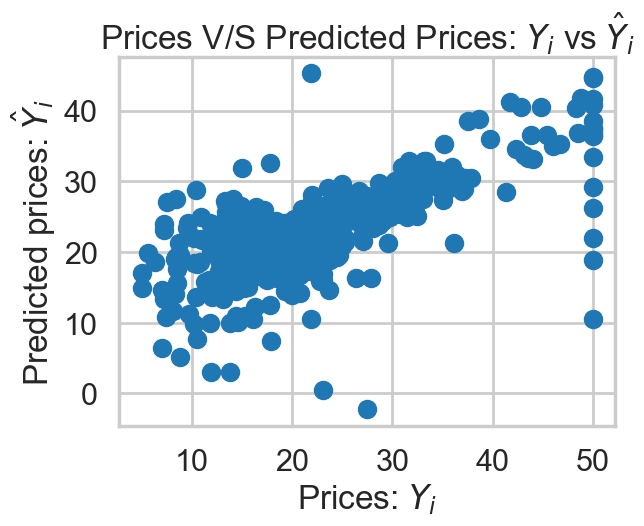

In [33]:
# Scatterplot between predicted and original prices 
plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices V/S Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

For large values of Y we get underpredictions, most predictions are below the 45-degree gridlines. 

### Fitting Linear Regression using `sklearn`


In [34]:
#Creating Linear Regression Object
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

lm = LinearRegression()
lm

LinearRegression()


The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [35]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

In [37]:

lm_nointer = LinearRegression(fit_intercept= False)
lm_nointer.fit(X, bos.PRICE)

LinearRegression(fit_intercept=False)

In [38]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.459488385090204


In [39]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [40]:
# List Coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [41]:
# The 1st 5 predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

Text(0, 0.5, 'Frequency')

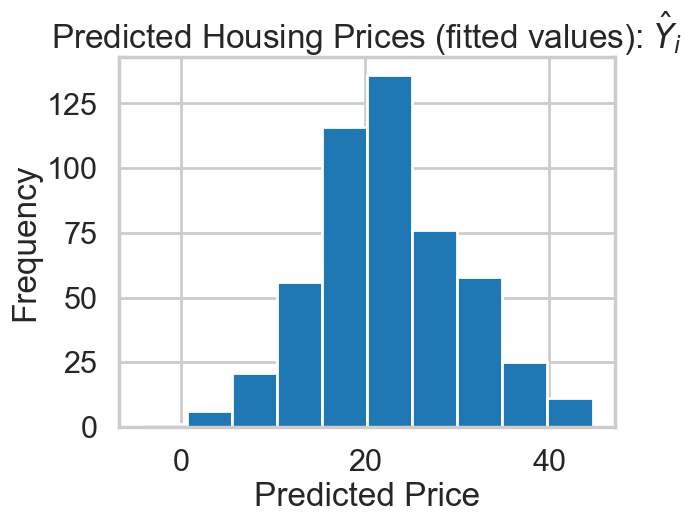

In [42]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

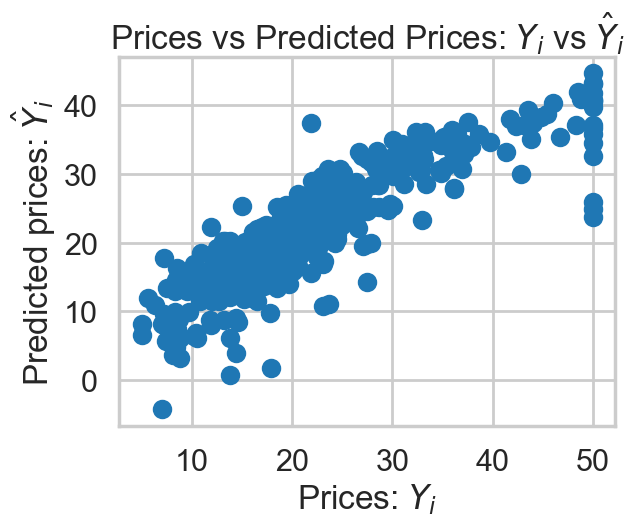

In [43]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [44]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


In [45]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)

SyntaxError: incomplete input (302879974.py, line 1)

In [46]:
# Using Statsmodel
m_ptratio = ols('PRICE ~ PTRATIO',bos).fit()
print(m_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.61e-34
Time:                        12:37:11   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [47]:

lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression()

In [48]:
r_squared = lm.score(X[['PTRATIO']], bos.PRICE)
print('Rsquared is:', r_squared)

Rsquared is: 0.257847318009223


In [49]:
import scipy.stats
rss = np.sum((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print('The RSS is:',rss)
ess = np.sum((lm.predict(X[['PTRATIO']]) - np.mean(bos.PRICE))**2)
print('The ESS is:', ess)
F_stat = (ess/rss)*(504)
print('The F statistic is:',F_stat)

p_value = 1 - scipy.stats.f.cdf(F_stat,505,10**-12)
print('The F_test p-value is:',p_value)

The RSS is: 31702.013206967255
The ESS is: 11014.282208052537
The F statistic is: 175.1055428756958
The F_test p-value is: 0.0


In [50]:
# Using Statsmodel
m_var = ols('PRICE ~ PTRATIO + CRIM + RM',bos).fit()
print(m_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           6.15e-98
Time:                        12:38:10   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [51]:
lm = LinearRegression()
lm.fit(X[['PTRATIO','CRIM','RM']], bos.PRICE)

LinearRegression()

In [52]:
import scipy.stats
rss = np.sum((bos.PRICE - lm.predict(X[['PTRATIO','CRIM','RM']])) ** 2)
print('The RSS is:',rss)
ess = np.sum((lm.predict(X[['PTRATIO','CRIM','RM']]) - np.mean(bos.PRICE))**2)
print('The ESS is:', ess)
F_stat = (ess/rss)*(502/3)
print('The F statistic is:',F_stat)

p_value = 1 - scipy.stats.f.cdf(F_stat,503,2)
print('The F_test p-value is:',p_value)

The RSS is: 17328.23712008025
The ESS is: 25388.058294939547
The F statistic is: 245.1644903006465
The F_test p-value is: 0.004070553797345999


In [53]:
r_squared = lm.score(X[['PTRATIO','CRIM','RM']], bos.PRICE)
print('Rsquared is:', r_squared)

Rsquared is: 0.5943412940723471


### Part 4:  Model Comparison

In [54]:
# Using Statsmodel
m_add = ols('PRICE ~ PTRATIO + CRIM + RM + TAX + AGE',bos).fit()
print(m_add.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          1.74e-100
Time:                        12:39:53   Log-Likelihood:                -1600.4
No. Observations:                 506   AIC:                             3213.
Df Residuals:                     500   BIC:                             3238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7363      4.006     -0.184      0.8

In [55]:
lm3 = LinearRegression()
lm3.fit(X[['PTRATIO','CRIM','RM', 'TAX', 'AGE']], bos.PRICE)

LinearRegression()

In [56]:
rss3 = npy.sum((bos.PRICE - lm3.predict(X[['PTRATIO','CRIM','RM', 'TAX', 'AGE']])) ** 2)
print('The RSS is:',rss3)
ess3 = npy.sum((lm3.predict(X[['PTRATIO','CRIM','RM', 'TAX', 'AGE']]) - np.mean(bos.PRICE))**2)
print('The ESS is:', ess3)
F_stat3 = (ess3/rss3)*(500/5)
print('The F statistic is:',F_stat3)

p_value3 = 1 - scipy.stats.f.cdf(F_stat3,501,4)
print('The F_test p-value is:',p_value3)

The RSS is: 16554.782940035606
The ESS is: 26161.512474984163
The F statistic is: 158.02993352281246
The F_test p-value is: 7.972418361079647e-05


In [57]:
F_comp = ((rss - rss3)/(502-500))/(rss3/500)
print('The F-statistic to compare both models is:', F_comp)

The F-statistic to compare both models is: 11.68022230865599



## #Part 5: Model Evaluation Including Checking ForAssumptions and Other Issues
***
Evaluating and checking assumptions



Text(0.5, 1.0, 'Fitted Vals V/S Residual Vals')

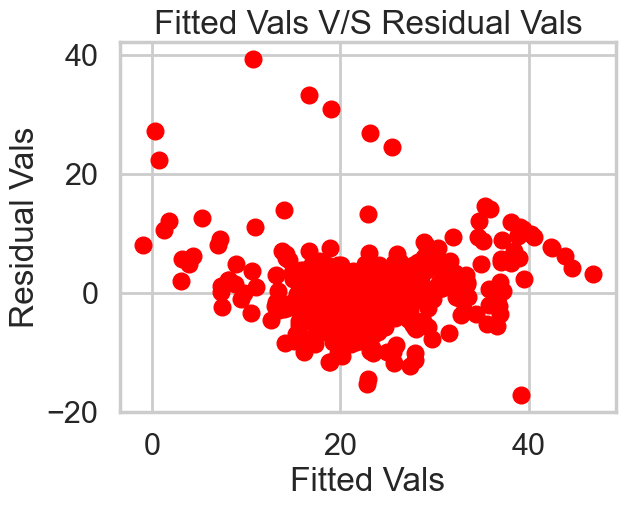

In [59]:
#m_var.fittedvalues
m_var.resid
plt.plot(m_var.fittedvalues,m_var.resid, 'ro')
plt.xlabel('Fitted Vals')
plt.ylabel('Residual Vals')
plt.title('Fitted Vals V/S Residual Vals')

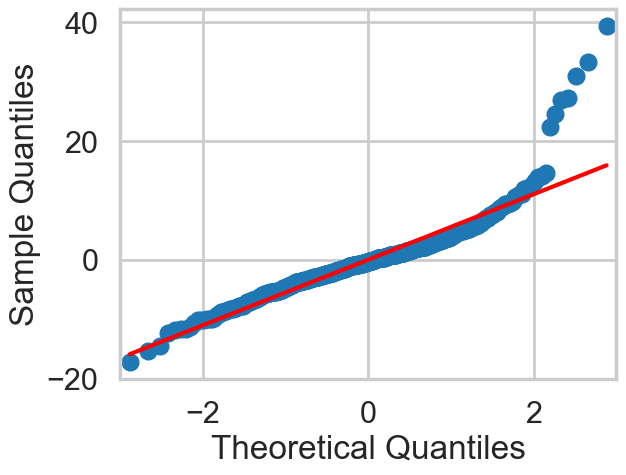

In [61]:
import pylab as pyl
sml.qqplot(m_var.resid, line = 'r')
pyl.show()

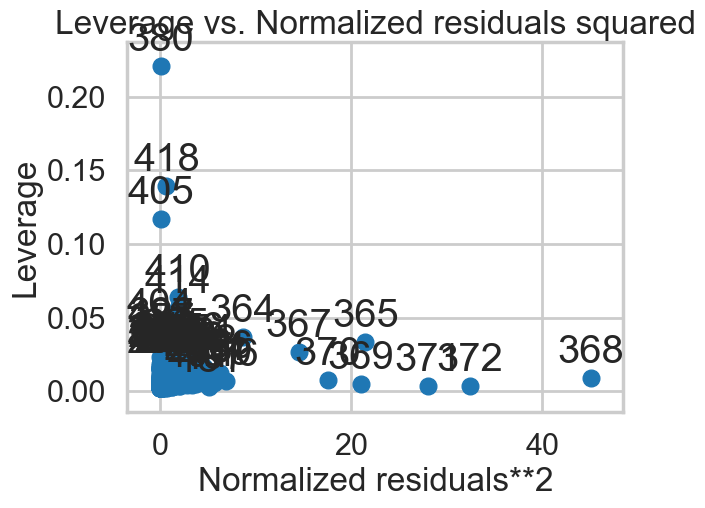

In [62]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(m_var)
plt.show()

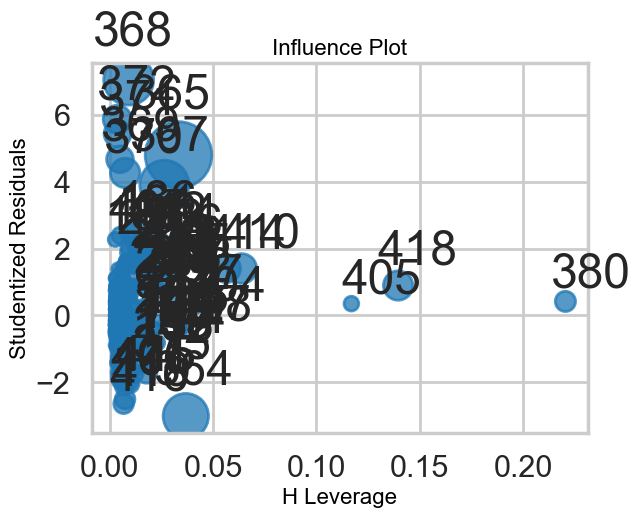

In [63]:
influence_plot(m_var)
plt.show()